In [76]:
import json

json_file = './raw/annotations/modanet2018_instances_train.json'
# json_file = './raw/annotations/modanet2018_instances_test.json'
d = json.load(open(json_file))
#pd.read_json(json_file)

In [77]:
d.keys()

dict_keys(['info', 'images', 'year', 'licenses', 'type', 'annotations', 'categories'])

In [19]:
# 'images' dataframe is not needed
# df = pd.DataFrame(d['images']).set_index('id').sort_index()
# df

In [21]:
# This is needed

df_ann = pd.DataFrame(d['annotations']).set_index(['image_id', 'id'])
df_ann

area                  bbox  category_id  iscrowd  \
image_id id                                                          
736791   0        1746    [160, 247, 97, 18]            2        0   
         1        1092    [287, 537, 26, 42]            4        0   
         2       37352  [132, 255, 161, 232]           11        0   
         3       14605  [145, 126, 115, 127]            9        0   
997730   4        1232     [142, 52, 56, 22]            7        0   
         5        9108    [113, 151, 92, 99]            9        0   
         6       12768  [117, 212, 114, 112]           11        0   
         7        1875    [165, 483, 25, 75]            4        0   
763229   8       28951  [122, 168, 131, 221]            9        0   
         9        9690   [195, 332, 57, 170]            8        0   
         10       3280    [216, 503, 41, 80]            4        0   
764244   11       6014     [140, 88, 97, 62]            9        0   
         12       1820      [157, 0, 20, 91]           13        0   
         13       9916     [139, 0, 67, 148]            5        0   
         14       5390    [128, 379, 55, 98]            4        0   
1019370  15      21390  [125, 276, 138, 155]            1        0   
         16        480    [301, 505, 24, 20]            4        0   
         17       1100    [179, 323, 50, 22]            6        0   
1019763  18       7800   [230, 165, 50, 156]            5        0   
         19       1815     [32, 515, 55, 33]            4        0   
         20        396     [277, 266, 9, 44]           13        0   
1019820  21        624    [229, 120, 13, 48]            1        0   
         22        882    [137, 238, 18, 49]            6        0   
         23       2822    [154, 479, 34, 83]            3        0   
1019822  24        825    [185, 542, 33, 25]            4        0   
         25      16275   [158, 339, 93, 175]            8        0   
         26       2006    [119, 291, 34, 59]            1        0   
         27       3600     [154, 73, 72, 50]           12        0   
         28       1656    [212, 308, 46, 36]            9        0   
         29      23460  [136, 162, 138, 170]            5        0   
...                ...                   ...          ...      ...   
602264   221247   3486    [181, 105, 42, 83]            5        0   
602400   221248   6975     [165, 69, 93, 75]           13        0   
         221249  35397   [117, 96, 171, 207]            5        0   
         221250  31784  [129, 284, 137, 232]            8        0   
         221251   1632    [232, 508, 48, 34]            4        0   
602422   221252   1952    [153, 229, 61, 32]            2        0   
         221253   5040    [133, 514, 80, 63]            4        0   
         221254  10492   [121, 233, 122, 86]            5        0   
602466   221255   3840    [260, 512, 60, 64]            4        0   
         221256   7920   [225, 146, 60, 132]            5        0   
         221257  14630  [189, 257, 110, 133]            6        0   
602493   221258   2002    [158, 252, 26, 77]            1        0   
         221259   5504    [198, 128, 64, 86]            9        0   
         221260  18762  [175, 206, 118, 159]           11        0   
         221261  22172   [185, 342, 92, 241]            8        0   
         221262   1140    [253, 535, 30, 38]            4        0   
         221263  10750   [257, 100, 50, 215]            5        0   
602519   221264  52866   [174, 71, 178, 297]            5        0   
         221265  26966   [15, 401, 139, 194]            1        0   
         221266    396    [276, 556, 18, 22]            4        0   
         221267  31104  [222, 348, 128, 243]            8        0   
602631   221268    924     [237, 51, 44, 21]            7        0   
         221269  25545  [174, 100, 131, 195]            9        0   
         221270  26660  [174, 270, 124, 215]            8        0   
         221271   4982   [20

In [70]:
df_annt_items = pd.DataFrame(d['annotations'])
cols = ['image_id']

df_annt = df_annt_items\
    .groupby(cols)\
    [df_annt_items.columns.difference(cols)]\
    .apply(lambda df_: df_.to_dict('records'))\
    .rename('items')\
    .reset_index()
df_annt

,image_id,items
0,3,"[{'area': 27242, 'bbox': [165, 214, 106, 257], 'category_id': 8, 'id': 55563..."
1,13,"[{'area': 3724, 'bbox': [163, 16, 76, 49], 'category_id': 12, 'id': 55567, '..."
2,148,"[{'area': 19865, 'bbox': [124, 94, 137, 145], 'category_id': 9, 'id': 55573,..."
3,156,"[{'area': 770, 'bbox': [153, 230, 70, 11], 'category_id': 2, 'id': 55577, 'i..."
4,174,"[{'area': 2040, 'bbox': [174, 67, 60, 34], 'category_id': 7, 'id': 51511, 'i..."
5,211,"[{'area': 1239, 'bbox': [271, 86, 59, 21], 'category_id': 7, 'id': 51516, 'i..."
6,224,"[{'area': 38394, 'bbox': [112, 111, 158, 243], 'category_id': 6, 'id': 51521..."
7,270,"[{'area': 2625, 'bbox': [157, 210, 75, 35], 'category_id': 2, 'id': 55580, '..."
8,271,"[{'area': 650, 'bbox': [202, 231, 50, 13], 'category_id': 2, 'id': 51523, 'i..."
9,365,"[{'area': 29212, 'bbox': [136, 119, 134, 218], 'category_id': 9, 'id': 51527..."


In [71]:
pd.set_option("display.max_colwidth", 80)
json_file = '~/datasets/PaperDoll/raw/labels/paperdoll.json'
df_ppdl = pd.read_json(json_file)[['snap_id', 'snap_url', 'post_url']]
# all snap_url in PaperDoll is not used in ModaNet,
# so need to crawl post_url to get correct snap images
# used in ModaNet
df_ppdl

,snap_id,snap_url,post_url
0,10,http://images1.chictopia.com/photos/homme/5747766283/5747766283_400.jpg,http://www.chictopia.com/photo/show/16781
1,15,http://images2.chictopia.com/photos/homme/4228182085/4228182085_400.jpg,http://www.chictopia.com/photo/show/9833
2,18,http://images3.chictopia.com/photos/homme/4923665344/3901610044/3901610044_4...,http://www.chictopia.com/photo/show/7413
3,27,http://images0.chictopia.com/photos/homme/3485785205/8697358695/8697358695_4...,http://www.chictopia.com/photo/show/1382
4,32,http://images1.chictopia.com/photos/thefashbot/9059100352/8419063962/8419063...,http://www.chictopia.com/photo/show/2841
5,35,http://images2.chictopia.com/photos/homme/10256538569/10256538569_400.jpg,http://www.chictopia.com/photo/show/858
6,47,http://images3.chictopia.com/photos/thefashbot/3889469336/4176175431/4176175...,http://www.chictopia.com/photo/show/3198
7,49,http://images0.chictopia.com/photos/thefashbot/4975347262/2429020265/2429020...,http://www.chictopia.com/photo/show/3197
8,50,http://images1.chictopia.com/photos/Luxenoir/7007622521/7819622158/781962215...,http://www.chictopia.com/photo/show/74064
9,54,http://images2.chictopia.com/photos/thefashbot/1215735417/2807707756/2807707...,http://www.chictopia.com/photo/show/2972


In [72]:
df_annt = df_annt\
    .merge(
        df_ppdl, left_on='image_id', right_on='snap_id',
        how='inner',
    )
df_annt

,image_id,items,snap_id,snap_url,post_url
0,148,"[{'area': 19865, 'bbox': [124, 94, 137, 145], 'category_id': 9, 'id': 55573,...",148,http://images1.chictopia.com/photos/poppylee/3083327112/5769522216/576952221...,http://www.chictopia.com/photo/show/10051
1,156,"[{'area': 770, 'bbox': [153, 230, 70, 11], 'category_id': 2, 'id': 55577, 'i...",156,http://images0.chictopia.com/photos/poppylee/8150270690/3832622107/383262210...,http://www.chictopia.com/photo/show/8173
2,174,"[{'area': 2040, 'bbox': [174, 67, 60, 34], 'category_id': 7, 'id': 51511, 'i...",174,http://images2.chictopia.com/photos/Carolina/7809452194/7809452194_400.jpg,http://www.chictopia.com/photo/show/6589
3,270,"[{'area': 2625, 'bbox': [157, 210, 75, 35], 'category_id': 2, 'id': 55580, '...",270,http://images1.chictopia.com/photos/camiller/2716745861/2024770406/202477040...,http://www.chictopia.com/photo/show/28321
4,365,"[{'area': 29212, 'bbox': [136, 119, 134, 218], 'category_id': 9, 'id': 51527...",365,http://images0.chictopia.com/photos/camiller/8723614401/7883612404/788361240...,http://www.chictopia.com/photo/show/12378
5,434,"[{'area': 3174, 'bbox': [176, 496, 46, 69], 'category_id': 4, 'id': 55604, '...",434,http://images2.chictopia.com/photos/pauline/4593504844/diy-dress-rick-owens-...,http://www.chictopia.com/photo/show/445266
6,471,"[{'area': 16154, 'bbox': [151, 314, 82, 197], 'category_id': 8, 'id': 55607,...",471,http://images0.chictopia.com/photos/camiller/2143780775/2143780775_400.jpg,http://www.chictopia.com/photo/show/4028
7,475,"[{'area': 28336, 'bbox': [145, 93, 112, 253], 'category_id': 6, 'id': 55612,...",475,http://images2.chictopia.com/photos/camiller/4110223846/1740917721/174091772...,http://www.chictopia.com/photo/show/3331
8,499,"[{'area': 29824, 'bbox': [121, 153, 128, 233], 'category_id': 6, 'id': 51531...",499,http://images3.chictopia.com/photos/c00kies/6452089061/2228862600/les-jumell...,http://www.chictopia.com/photo/show/220100
9,709,"[{'area': 10020, 'bbox': [106, 137, 60, 167], 'category_id': 5, 'id': 55621,...",709,http://images2.chictopia.com/photos/Lomelino/10898918432/6620656439/66206564...,http://www.chictopia.com/photo/show/19027


In [73]:
df_annt

,image_id,items,snap_id,snap_url,post_url
0,148,"[{'area': 19865, 'bbox': [124, 94, 137, 145], 'category_id': 9, 'id': 55573,...",148,http://images1.chictopia.com/photos/poppylee/3083327112/5769522216/576952221...,http://www.chictopia.com/photo/show/10051
1,156,"[{'area': 770, 'bbox': [153, 230, 70, 11], 'category_id': 2, 'id': 55577, 'i...",156,http://images0.chictopia.com/photos/poppylee/8150270690/3832622107/383262210...,http://www.chictopia.com/photo/show/8173
2,174,"[{'area': 2040, 'bbox': [174, 67, 60, 34], 'category_id': 7, 'id': 51511, 'i...",174,http://images2.chictopia.com/photos/Carolina/7809452194/7809452194_400.jpg,http://www.chictopia.com/photo/show/6589
3,270,"[{'area': 2625, 'bbox': [157, 210, 75, 35], 'category_id': 2, 'id': 55580, '...",270,http://images1.chictopia.com/photos/camiller/2716745861/2024770406/202477040...,http://www.chictopia.com/photo/show/28321
4,365,"[{'area': 29212, 'bbox': [136, 119, 134, 218], 'category_id': 9, 'id': 51527...",365,http://images0.chictopia.com/photos/camiller/8723614401/7883612404/788361240...,http://www.chictopia.com/photo/show/12378
5,434,"[{'area': 3174, 'bbox': [176, 496, 46, 69], 'category_id': 4, 'id': 55604, '...",434,http://images2.chictopia.com/photos/pauline/4593504844/diy-dress-rick-owens-...,http://www.chictopia.com/photo/show/445266
6,471,"[{'area': 16154, 'bbox': [151, 314, 82, 197], 'category_id': 8, 'id': 55607,...",471,http://images0.chictopia.com/photos/camiller/2143780775/2143780775_400.jpg,http://www.chictopia.com/photo/show/4028
7,475,"[{'area': 28336, 'bbox': [145, 93, 112, 253], 'category_id': 6, 'id': 55612,...",475,http://images2.chictopia.com/photos/camiller/4110223846/1740917721/174091772...,http://www.chictopia.com/photo/show/3331
8,499,"[{'area': 29824, 'bbox': [121, 153, 128, 233], 'category_id': 6, 'id': 51531...",499,http://images3.chictopia.com/photos/c00kies/6452089061/2228862600/les-jumell...,http://www.chictopia.com/photo/show/220100
9,709,"[{'area': 10020, 'bbox': [106, 137, 60, 167], 'category_id': 5, 'id': 55621,...",709,http://images2.chictopia.com/photos/Lomelino/10898918432/6620656439/66206564...,http://www.chictopia.com/photo/show/19027


In [68]:
# too slow
# from tqdm._tqdm_notebook import tqdm_notebook as tqdm

# tqdm.pandas()

# def post2snap(post_url):
#     res = requests.get(post_url)
#     soup = BeautifulSoup(res.text)
#     snap_url = soup.find('div', id="image_wrap")\
#         .find('img')['src']
#     return snap_url

# df_annt['post_url'].progress_apply(post2snap)

In [50]:
from glob import glob

img_files = glob('./images/*')
img_files = sorted(img_files)
ids_downloaded = np.array([
    int(os.path.basename(img_file).split('.')[0])
    for img_file in img_files])

itd = iter(img_files)

(156, 'http://www.chictopia.com/photo/show/8173')

(-0.5, 399.5, 599.5, -0.5)

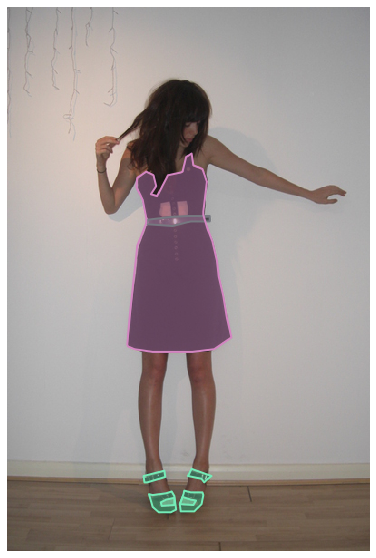

In [16]:
from PIL import Image

img_id, post_url = next(it)
img_id, post_url 

import requests
from bs4 import BeautifulSoup

def post2snap(post_url):
    res = requests.get(post_url)
    soup = BeautifulSoup(res.text)
    snap_url = soup.find('div', id="image_wrap")\
        .find('img')['src']
    return snap_url

#from IPython.display import Image

#Image(url)
#requests.get(url).text
from io import BytesIO

r = requests.get(post2snap(post_url))
I = Image.open(BytesIO(r.content))

plt.imshow(I)
plt.axis('off')

annIds = coco.getAnnIds(imgIds=img_id, catIds=all_ctg_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [34]:
from pycocotools.coco import COCO

json_file = './raw/annotations/modanet2018_instances_train.json'
coco=COCO(json_file)

loading annotations into memory...
Done (t=4.08s)
creating index...
index created!


In [8]:
cats = coco.loadCats(coco.getCatIds())
all_ctgs = [cat['name'] for cat in cats]
all_ctgs

all_ctg_ids = coco.getCatIds(catNms=all_ctgs)
all_ctg_ids

['bag',
 'belt',
 'boots',
 'footwear',
 'coat/jacket/suit/blazers/cardigan/sweater/Jumpsuits/Rompers/vest',
 'dress/t-shir dress',
 'sunglasses',
 'pants/jeans/leggings',
 'top/blouse/t-shirt/shirt',
 'shorts',
 'skirt',
 'headwear',
 'scarf/tie']

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [9]:
df_ctg = pd.Series(all_ctgs).reset_index()
df_ctg.columns = ['category_id', 'category']

# save
#df_ctg.to_csv('./labels/categories.tsv', sep='\t', index=False)

174

(-0.5, 399.5, 599.5, -0.5)

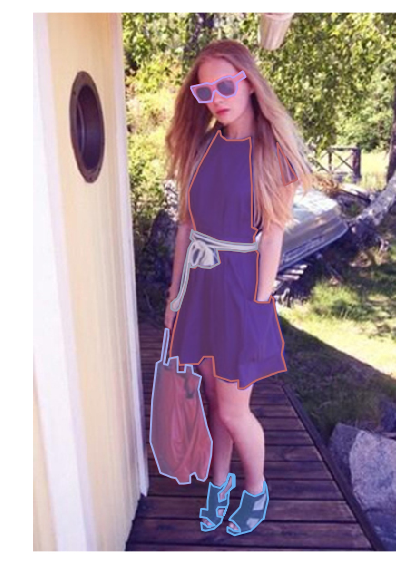

In [53]:
img_file = next(itd)
#img_file = './images/0001152.jpg'

I = io.imread(img_file)

img_id =int(os.path.basename(img_file).split('.')[0])
img_id

plt.imshow(I)

plt.axis('off')
annIds = coco.getAnnIds(imgIds=img_id, catIds=all_ctg_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

(7, 'sunglasses')

(6, 'dress/t-shir dress')

(2, 'belt')

(1, 'bag')

(4, 'footwear')

(600, 400)

(-1, 6)

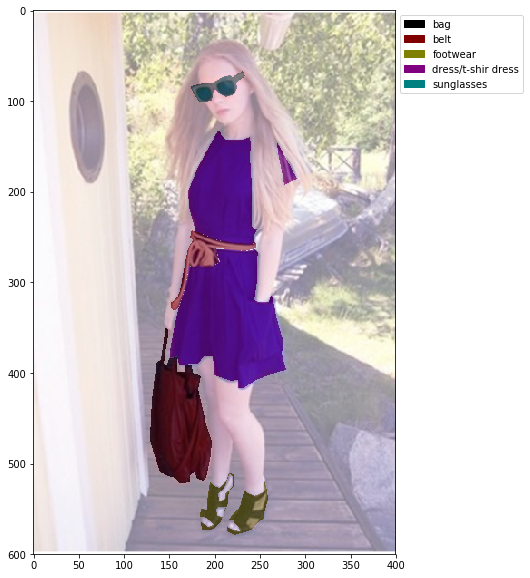

In [63]:
# for chainer
# label
img = coco.loadImgs(img_id)[0]
h, w = img['height'], img['width']

label = np.zeros((h,w)).astype(np.int32)
catids = list()
for ann in anns:
    catid = ann['category_id']
    catids.append(catid)
    cat = coco.loadCats(ids=[ann['category_id']])[0]['name']
    catid, cat
    
    label += np.int32(coco.annToMask(ann)) * ann['category_id']
    
label[~(np.isin(label, catids))] = 0
label = label - 1
label.shape
label.min(), label.max()

# image
img = np.array(Image.open(img_file).convert('RGB'))\
    .transpose(2, 0, 1)

# show
from chainercv.visualizations import vis_semantic_segmentation

ax, lenged_handles = vis_semantic_segmentation(
                        img, label,
                        label_names=all_ctgs,
                        ignore_label_color=(255,255,255),
                        alpha=0.5,
                        all_label_names_in_legend=True)
ax.legend(handles=lenged_handles,
          bbox_to_anchor=(1,1), loc=2)